In [ ]:
# install openai and langchain
%pip install -q openai
%pip install -q langchain
%pip install -q langchain_community
%pip install -q langchain_openai

# install dependencies needed for document loader and vector store
%pip install pypdf
%pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 33.5 MB/s eta 0:00:00


In [ ]:
# retrieve OPENAI key to use
from google.colab import userdata
import os
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [ ]:
# Download a sample PDF using wget to use, this is a paper on langchain
!wget -O sample.pdf https://arxiv.org/pdf/2302.13971.pdf

--2025-02-26 01:21:09--  https://arxiv.org/pdf/2302.13971.pdf
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.131.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2302.13971 [following]
--2025-02-26 01:21:09--  http://arxiv.org/pdf/2302.13971
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726566 (710K) [application/pdf]
Saving to: ‘sample.pdf’

sample.pdf          100%[===================>] 709.54K  --.-KB/s    in 0.05s   

2025-02-26 01:21:09 (12.8 MB/s) - ‘sample.pdf’ saved [726566/726566]



## LangChain

In [ ]:
# If you want to review what we learned in the last workshop, go to https://z.umn.edu/gai-first-workshop-code

Document Loader

In [ ]:
# import PyPDFLoader, helps load pdf files and extracts their contents by page
from langchain.document_loaders import PyPDFLoader

# initialize a pdf loader and direct it to the sample pdf we downloaded
loader = PyPDFLoader("sample.pdf")

# loads pdf file into list of document objects that each contain the text and metadata of one page
documents = loader.load()

# add some metadata to each page
for i, doc in enumerate(documents):
    # add page number
    doc.metadata["page"] = i + 1

# check number of pages loaded
print(f"Loaded {len(documents)} pages from the PDF.")

# look at metadata and preview first 1400 characters from first page
print(f"First page metadata: {documents[0].metadata}")
print(documents[0].page_content[:1400])

Loaded 27 pages from the PDF.
First page metadata: {'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-02-28T01:57:46+00:00', 'author': '', 'keywords': '', 'moddate': '2023-02-28T01:57:46+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'sample.pdf', 'total_pages': 27, 'page': 1, 'page_label': '1'}
LLaMA: Open and Efﬁcient Foundation Language Models
Hugo Touvron∗, Thibaut Lavril∗, Gautier Izacard ∗, Xavier Martinet
Marie-Anne Lachaux, Timothee Lacroix, Baptiste Rozière, Naman Goyal
Eric Hambro, Faisal Azhar, Aurelien Rodriguez, Armand Joulin
Edouard Grave∗, Guillaume Lample∗
Meta AI
Abstract
We introduce LLaMA, a collection of founda-
tion language models ranging from 7B to 65B
parameters. We train our models on trillions
of tokens, and show that it is possible to train
state-of-the-art models using publicly avail-
able dataset

Text Splitter

In [ ]:
# import RecursiveCharacterTextSplitter, helps break large text into smaller more manageable chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter

# initialize text splitter tool
text_splitter = RecursiveCharacterTextSplitter(
    # each chunk has size of approximately 1000 characters
    chunk_size=1000,
    # allow overlap of 200 characters with previous chunk to maintain context
    chunk_overlap=200
)

# use text splitter on documents
chunks = text_splitter.split_documents(documents)

# adding some metadata to the chunks
for chunk in chunks:
    # asisgning the associated page number with each chunk
    chunk.metadata["page"] = chunk.metadata.get("page", "Unknown")

# check numbers of chunks the documents was split into
print(f"Split the document into {len(chunks)} chunks.")

# look at metadata and preview first 500 characters of first chunk
print(f"First chunk metadata: {chunks[0].metadata}")
print(chunks[0].page_content[:500]) # can test 1400

Split the document into 118 chunks.
First chunk metadata: {'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-02-28T01:57:46+00:00', 'author': '', 'keywords': '', 'moddate': '2023-02-28T01:57:46+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'sample.pdf', 'total_pages': 27, 'page': 1, 'page_label': '1'}
LLaMA: Open and Efﬁcient Foundation Language Models
Hugo Touvron∗, Thibaut Lavril∗, Gautier Izacard ∗, Xavier Martinet
Marie-Anne Lachaux, Timothee Lacroix, Baptiste Rozière, Naman Goyal
Eric Hambro, Faisal Azhar, Aurelien Rodriguez, Armand Joulin
Edouard Grave∗, Guillaume Lample∗
Meta AI
Abstract
We introduce LLaMA, a collection of founda-
tion language models ranging from 7B to 65B
parameters. We train our models on trillions
of tokens, and show that it is possible to train
state-of-the-art mo


Vector Store

In [ ]:
# import OpenAIEmbeddings to generate embeddings of text
# embeddings are essentially number/vector representations of text, allows for llms to make connections between text easily
from langchain.embeddings.openai import OpenAIEmbeddings

# import FAISS vector store, allows us to efficiently store and search through embeddings
from langchain.vectorstores.faiss import FAISS

# initialize embedding model, converts chunks of text into numerical vectors that can be used for similarity searches
embeddings = OpenAIEmbeddings()

# create a FAISS vector store, from_documents takes the chunks and converts them into embeddings before storing them
vectorstore = FAISS.from_documents(chunks, embeddings)

# view how many vectors are stored in the FAISS
print(f"Number of vectors in FAISS: {vectorstore.index.ntotal}")

<ipython-input-8-27a0c5c0e95f>:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


Number of vectors in FAISS: 118


Retriever

In [ ]:
# convert vector store into retriever object, allows for easy interface to perform similarity searches across the document chunks
retriever = vectorstore.as_retriever()

# our query search
query = "What is LangChain?"

# use retriever to get documents relevant to the query
retrieved_docs = retriever.get_relevant_documents(query)

# look at how many document chunks were retrieved
print(f"Retrieved {len(retrieved_docs)} documents relevant to the query:\n")

# look through each chunk
for i, doc in enumerate(retrieved_docs):
    # print chunk number and its original PDF page number
    print(f"Document {i+1} (Page {doc.metadata['page']}):")
    # show the first 500 characters of the retrieved document chunk
    print(doc.page_content[:1000])
    # divider between chunks, just easier to read
    print('-' * 50)

<ipython-input-9-6b61f4fc40c9>:8: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever.get_relevant_documents(query)


Retrieved 4 documents relevant to the query:

Document 1 (Page 15):
kumar Prabhakaran, Mark Diaz, Ben Hutchinson,
Kristen Olson, Alejandra Molina, Erin Hoffman-
John, Josh Lee, Lora Aroyo, Ravi Rajakumar,
Alena Butryna, Matthew Lamm, Viktoriya Kuzmina,
Joe Fenton, Aaron Cohen, Rachel Bernstein, Ray
Kurzweil, Blaise Aguera-Arcas, Claire Cui, Marian
Croak, Ed Chi, and Quoc Le. 2022. Lamda: Lan-
guage models for dialog applications.
A. M. Turing. 1950. Computing Machinery and Intel-
ligence. [Oxford University Press, Mind Associa-
tion].
Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob
Uszkoreit, Llion Jones, Aidan N Gomez, Ł ukasz
Kaiser, and Illia Polosukhin. 2017. Attention is all
you need. In Advances in Neural Information Pro-
cessing Systems 30, pages 5998–6008.
Ben Wang and Aran Komatsuzaki. 2021. GPT-J-
6B: A 6 Billion Parameter Autoregressive Lan-
guage Model. https://github.com/kingoflolz/
mesh-transformer-jax.
Xuezhi Wang, Jason Wei, Dale Schuurmans, Quoc
Le, Ed Chi, Sharan Nar

In [ ]:
# import OpenAI, access models to generate responses
from langchain.llms import OpenAI

# import RetrievalQA, connects a retriever to a llm, so it can find relevant documents and generate an answer
from langchain.chains import RetrievalQA

# initialize llm model, temperature controls the models randomness, 0 is more deterministic
llm = OpenAI(temperature=0)

# initialize retrievalQA chain
# llm is the model which generates answers
# chain_type "stuff" means the chain takes the documents and stuffs them into a prompt
# retriever is used to find relevatn documents to the prompt
qa_chain = RetrievalQA.from_chain_type(llm, chain_type="stuff", retriever=retriever)

# formulate quetion
question = "Explain the purpose of LangChain."

# put question into the qa_chain to get an answer and print
answer = qa_chain.invoke(question)
print(f"Answer: {answer['result']}")

# try asking a hard question, see if it's correct

hard_question = "Who are the authors of the LangChain paper?"
hard_answer = qa_chain.invoke(hard_question)
print(f"Hard Answer: {hard_answer['result']}")

Answer: 

LangChain is a large language model that is designed to improve chain of thought reasoning in language models. It is trained on massive corpora of texts and is able to perform new tasks from textual instructions or from a few examples. The objective of LangChain is to determine how to best scale the dataset and model sizes for a particular training compute budget, taking into account both the training and inference budgets. It is evaluated on free-form generation tasks and multiple choice tasks, where it selects the most appropriate completion based on a provided context.
Hard Answer:  I don't know.


Agents

In [ ]:
# import Tool, allows for custom tools to be made
from langchain.tools import Tool

# import initialize_agent to create and configure new agents, AgentType is used to define agents based on their reasoning capabilities
from langchain.agents import initialize_agent, AgentType

# Note, like memory which we discussed last workshop, Agents are also migrating over to LangGraph
# look into the documentation if you are interested

# define a retriever tool that uses the retriever to get relevant documents
retrieval_tool = Tool(
    # name of the tool
    name="document_retriever",
    # function of the tool
    func=retriever.get_relevant_documents,
    # description of tool
    description="Use this tool to retrieve information from the document based on a query."
)

# initialize an agent with llm and tools
agent_1 = initialize_agent(
    # what tools the agent can use, just one in this case
    tools=[retrieval_tool],
    # what llm the agent uses to formulate responses
    llm=llm,
    # specify the type of agent, zero shot reasoning is useful for various tasks without training on them
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    # verbose output just for tracking and debugging purposes
    verbose=True
)

response = agent_1.invoke("What is LangChain?")
print(response['output'])

<ipython-input-13-ac90e2d7db83>:21: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent_1 = initialize_agent(




> Entering new AgentExecutor chain...
 I should use the document_retriever tool to retrieve information about LangChain.
Action: document_retriever
Action Input: query='LangChain'
Observation: [Document(id='d16e877b-e6e3-4f28-a293-0136a61d1270', metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-02-28T01:57:46+00:00', 'author': '', 'keywords': '', 'moddate': '2023-02-28T01:57:46+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'sample.pdf', 'total_pages': 27, 'page': 13, 'page_label': '13'}, page_content='Hyung Won Chung, Le Hou, S. Longpre, Barret\nZoph, Yi Tay, William Fedus, Eric Li, Xuezhi\nWang, Mostafa Dehghani, Siddhartha Brahma, Al-\nbert Webson, Shixiang Shane Gu, Zhuyun Dai,\nMirac Suzgun, Xinyun Chen, Aakanksha Chowdh-\nery, Dasha Valter, Sharan Narang, Gaurav Mishra,\nAdams Wei Yu, Vincent Zhao, Yanping 

More tools!

In [ ]:
llm = OpenAI(temperature=0, max_tokens=500)

# define a calculation function
def perform_calculation(query: str):
    try:
        # eval evaluates simple math equations
        result = eval(query)
        return f"The result of {query} is: {result}"
    except Exception as e:
        return f"Error performing calculation: {e}"

# define a math calculation tool
calculation_tool = Tool(
    name="calculator",
    func=perform_calculation,
    description="Use this tool to perform basic math calculations."
)

# initialize agent
agent_2 = initialize_agent(
    tools=[calculation_tool, retrieval_tool],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

response = agent_2.invoke("What is 5 * 8?")
print(response['output'])



> Entering new AgentExecutor chain...
 I should use the calculator tool to perform basic math calculations.
Action: calculator
Action Input: 5 * 8
Observation: The result of 5 * 8 is: 40
Thought: I now know the final answer.
Final Answer: The final answer is 40.

> Finished chain.
The final answer is 40.


# Transformers and Self-Attention

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

In [ ]:
def visualize_self_attention(model, tokenizer, sentence, layer=0, head=0):
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**tokens)

    attentions = outputs.attentions  # Shape: (num_layers, batch_size, num_heads, seq_len, seq_len)
    attention_layer = attentions[layer][0, head].detach().cpu().numpy()

    token_list = tokenizer.convert_ids_to_tokens(tokens["input_ids"][0])

    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_layer, xticklabels=token_list, yticklabels=token_list, cmap="coolwarm", annot=True)
    plt.title(f"Self-Attention at Layer {layer}, Head {head}")
    plt.show()

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

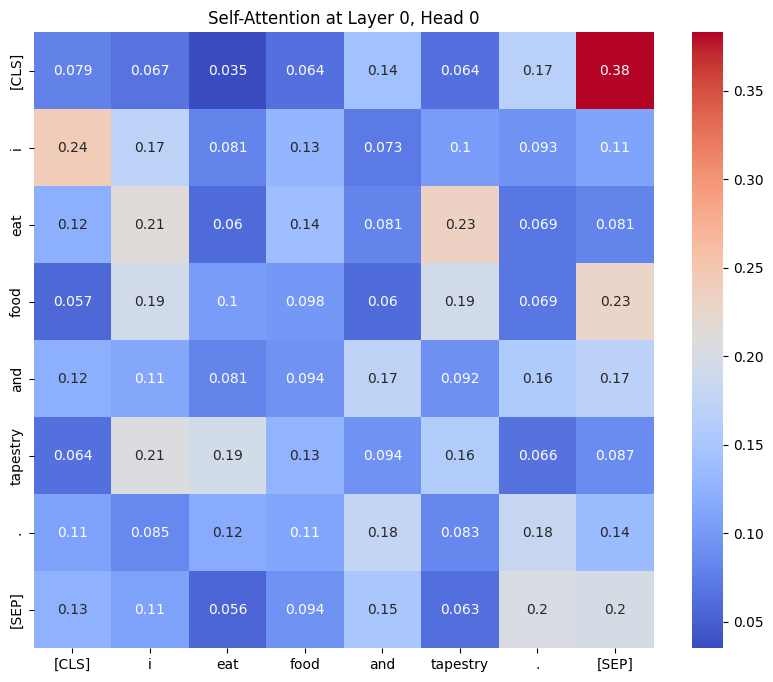

In [ ]:
sentence = "I eat food and tapestry."
visualize_self_attention(model, tokenizer, sentence, layer=0, head=0)